# Data Quality Assesment

In [12]:
from dotenv import load_dotenv
load_dotenv()
import pandas as pd
import kaggle as kg
import zipfile
import matplotlib.pyplot as plt
import textstat
import re


kg.api.authenticate()

## Downloading the dataset

In [13]:
kg.api.competition_download_files(competition = 'learning-agency-lab-automated-essay-scoring-2', path='../src/datasets', quiet = False)
zf = zipfile.ZipFile('../src/datasets/learning-agency-lab-automated-essay-scoring-2.zip') 
submission = pd.read_csv(zf.open('sample_submission.csv'))
test = pd.read_csv(zf.open('test.csv'))
train = pd.read_csv(zf.open('train.csv'))

learning-agency-lab-automated-essay-scoring-2.zip: Skipping, found more recently modified local copy (use --force to force download)


## Explore Dataset

### Essay Length Distribution

In [14]:
# Function to count relevant characters (letters, '.', ',', etc.)
def count_relevant_chars(text):
    return len(re.findall(r"[a-zA-Z0-9.,'\"!?;:()\-]", text))

# Function to count words
train['word_count'] = train['full_text'].apply(lambda x: len(x.split()))

# Find the shortest text by character count
shortest_char_text = train.loc[train['full_text'].apply(count_relevant_chars).idxmin()]
shortest_char_id = shortest_char_text['essay_id']
shortest_char_word_count = shortest_char_text['word_count']
shortest_char_filtered_count = count_relevant_chars(shortest_char_text['full_text'])
print(f"Shortest full_text by char count (ID: {shortest_char_id}): \n{shortest_char_text['full_text']}")
print(f"Filtered Character Count (excluding spaces, tabs, etc.): {shortest_char_filtered_count}")
print(f"Word Count: {shortest_char_word_count}")
print(f"Score: {shortest_char_text['score']}\n\n")


# Find the shortest text by word count
shortest_word_text = train.loc[train['word_count'].idxmin()]
shortest_word_id = shortest_word_text['essay_id']
shortest_word_filtered_count = count_relevant_chars(shortest_word_text['full_text'])
print(f"Shortest full_text by word count (ID: {shortest_word_id}): \n{shortest_word_text['full_text']}")
print(f"Word Count: {shortest_word_text['word_count']}")
print(f"Filtered Character Count (excluding spaces, tabs, etc.): {shortest_word_filtered_count}")
print(f"Score: {shortest_word_text['score']}\n\n")

# Find the longest text by character count
longest_char_text = train.loc[train['full_text'].apply(count_relevant_chars).idxmax()]
longest_char_id = longest_char_text['essay_id']
longest_char_word_count = longest_char_text['word_count']
longest_char_filtered_count = count_relevant_chars(longest_char_text['full_text'])
print(f"Longest full_text by char count (ID: {longest_char_id}): \n{longest_char_text['full_text']}")
print(f"Filtered Character Count (excluding spaces, tabs, etc.): {longest_char_filtered_count}")
print(f"Word Count: {longest_char_word_count}")
print(f"Score: {longest_char_text['score']}\n\n")

# Find the longest text by word count
longest_word_text = train.loc[train['word_count'].idxmax()]
longest_word_id = longest_word_text['essay_id']
longest_word_filtered_count = count_relevant_chars(longest_word_text['full_text'])
print(f"Longest full_text by word count (ID: {longest_word_id}): \n{longest_word_text['full_text']}")
print(f"Word Count: {longest_word_text['word_count']}")
print(f"Filtered Character Count (excluding spaces, tabs, etc.): {longest_word_filtered_count}")
print(f"Score: {longest_word_text['score']}")


Shortest full_text by char count (ID: a7dd51f): 
It would be a good and worthy pursuit because it is what we call are "twin" planet due to size and density but yet it is to dngerouse to be able to travle ther because it is to close to the sun and you would ony be able to be on Venus for no more than a few hours on the plant and we dont have the resources to be able to send men to Venus constantly due to the matelas that we are limited on and soon enough we would run out the things that men will need to be able to stay and make it to Venus alive and still have the resouces to be able to make it back to earth with out having complacations on weather there are going to make it there and back with the limited amout of resouces that they will be sent with 
Filtered Character Count (excluding spaces, tabs, etc.): 561
Word Count: 151
Score: 2


Shortest full_text by word count (ID: 1e23fee): 
The other is presenting the dangerous of venus. Exploring venus can be very dangerous because of high

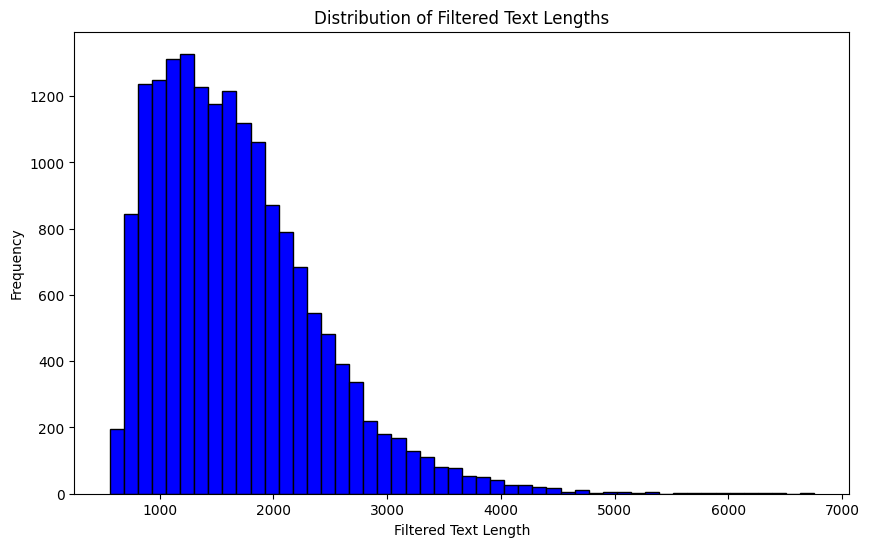

In [15]:
# Calculate the length of each text using the filtered character count
train['filtered_text_length'] = train['full_text'].apply(count_relevant_chars)

# Plot the histogram for filtered character count
plt.figure(figsize=(10, 6))
plt.hist(train['filtered_text_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Filtered Text Lengths')
plt.xlabel('Filtered Text Length')
plt.ylabel('Frequency')
plt.show()

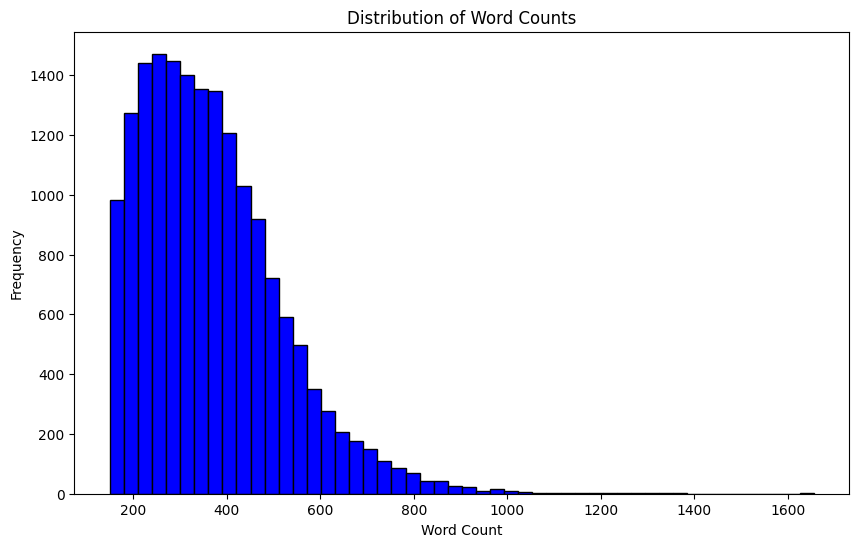

In [16]:
# Calculate the word count of each text
train['word_count'] = train['full_text'].str.split().str.len()

# Plot the histogram for word count
plt.figure(figsize=(10, 6))
plt.hist(train['word_count'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

### Essay Score Distribution 

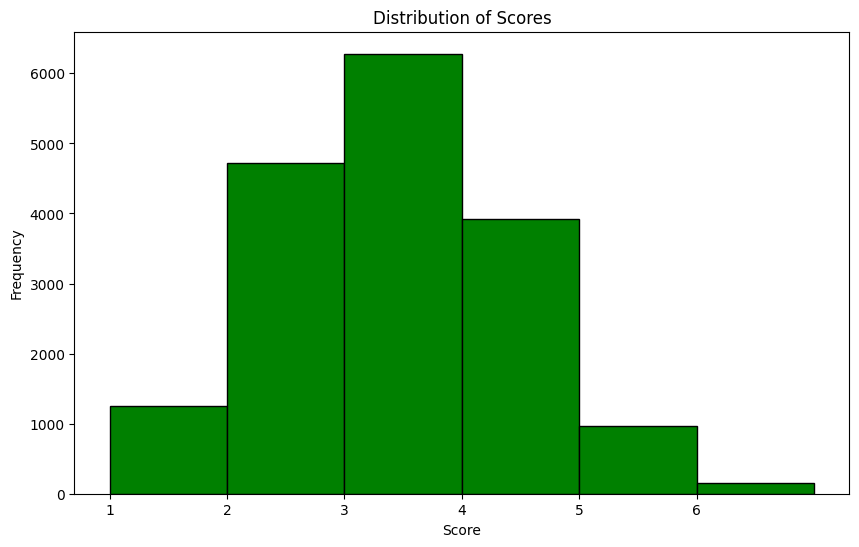

In [17]:
# Plot the distribution of scores
plt.figure(figsize=(10, 6))
plt.hist(train['score'], bins=[1, 2, 3, 4, 5, 6, 7], color='green', edgecolor='black')  # Explicit bin edges
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))  # Set x-ticks for scores 1 through 6
plt.show()


### Essay Length & Score Correlation

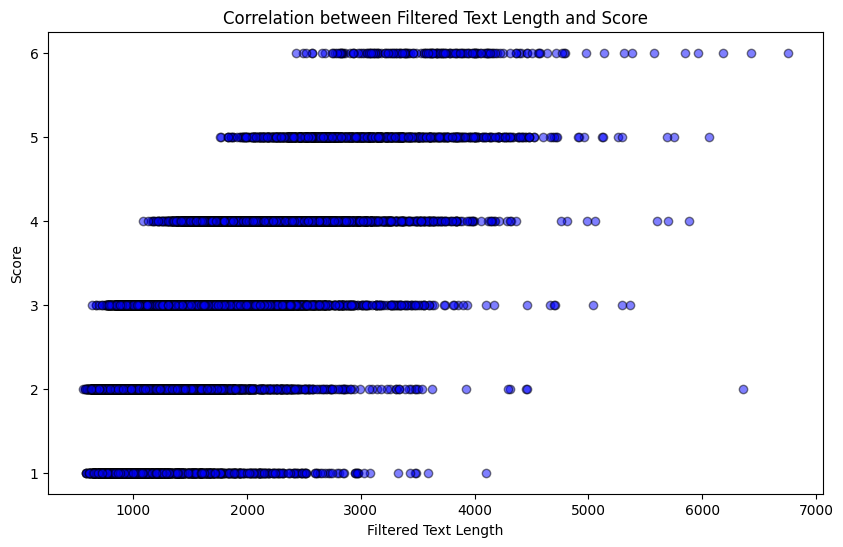

In [18]:
# Plot the correlation between score and filtered text length (in characters)
plt.figure(figsize=(10, 6))
plt.scatter(train['filtered_text_length'], train['score'], alpha=0.5, color='blue', edgecolor='black')
plt.title('Correlation between Filtered Text Length and Score')
plt.xlabel('Filtered Text Length')
plt.ylabel('Score')
plt.show()

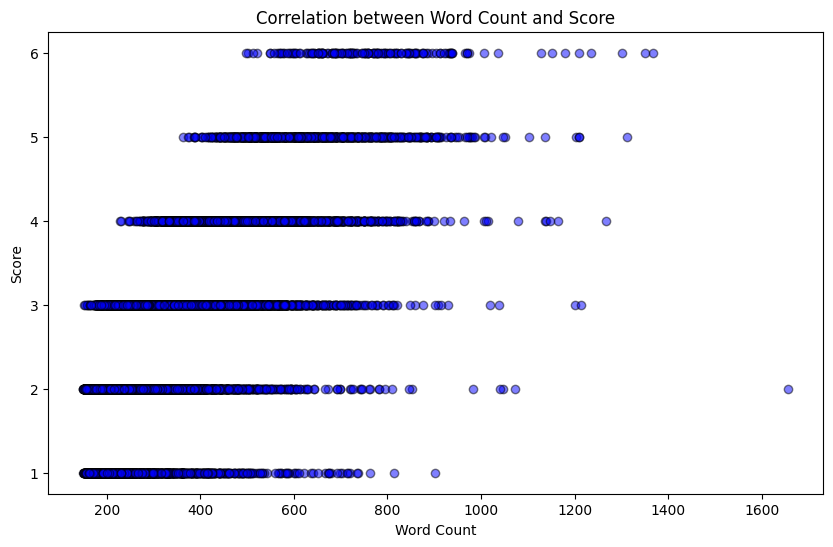

In [19]:
# Plot the correlation between score and word count
plt.figure(figsize=(10, 6))
plt.scatter(train['word_count'], train['score'], alpha=0.5, color='blue', edgecolor='black')
plt.title('Correlation between Word Count and Score')
plt.xlabel('Word Count')
plt.ylabel('Score')
plt.show()

### Flesh Kincaid Readability tests
The Flesch–Kincaid readability tests are readability tests designed to indicate how difficult a passage in English is to understand.


#### Flesh reading ease
In the Flesch reading-ease test, higher scores indicate material that is easier to read; lower numbers mark passages that are more difficult to read. The formula for the Flesch reading-ease score (FRES) test is:

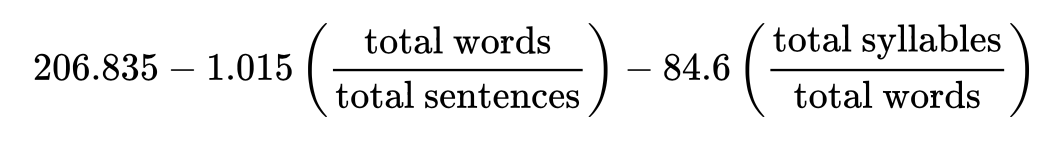

## Looking at the correlations

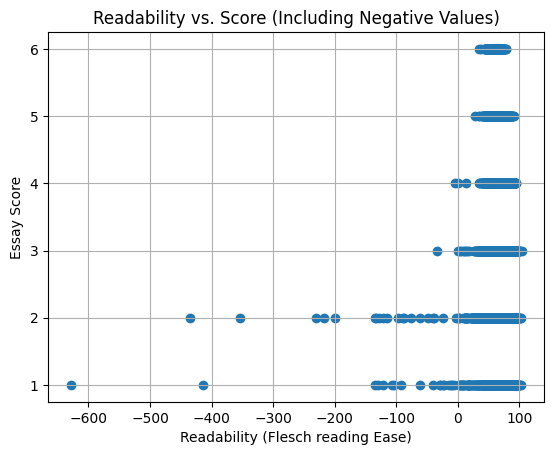

Outliers (readability < -100):
      essay_id                                          full_text  score  \
1083   1111bf7  i would rather change to voting for most popul...      2   
3357   31dd5a1  limiting car usage has an advantage because in...      2   
3725   3738994  The technoligy I dont think will be able to re...      2   
4588   4456d26  Cars have been by all means the number one way...      2   
5457   514afa4  if i had to choose i would change to election ...      1   
5638   542ea94  In the story the challange of exploring venus ...      2   
6018   5a1f872  In my opinion i think that driverless cars are...      2   
6527   6196d6e  the presidental election is to find a new lead...      1   
6568   6226875  In the article said that is dangerous to explo...      2   
8261   7b59f1a  My name is clint i am a sciencetist at NASA th...      1   
8653   8078135  Venus is called sometimse the evenind ster\n\n...      1   
9607   8dfaea5  he has to parttime jobs and he is on a sh

In [20]:
# Calculate the readability of each text
train['readability'] = train['full_text'].apply(textstat.flesch_reading_ease)

plt.scatter(train['readability'], train['score'])
plt.title('Readability vs. Score (Including Negative Values)')
plt.xlabel('Readability (Flesch reading Ease)')
plt.ylabel('Essay Score')
plt.grid(True)
plt.show()

# Identify some outliers
outliers = train[train['readability'] < -100]
print("Outliers (readability < -100):")
print(outliers)

correlation = train['readability'].corr(train['score'])
print(f"Correlation between readability and score: {correlation}")

#### Flesh Kincaid Grade Score
The "Flesch–Kincaid Grade Level Formula" presents a score as a U.S. grade level, making it easier for teachers, parents, librarians, and others to judge the readability level of various books and texts. It can also mean the number of years of education generally required to understand this text, relevant when the formula results in a number greater than 10.

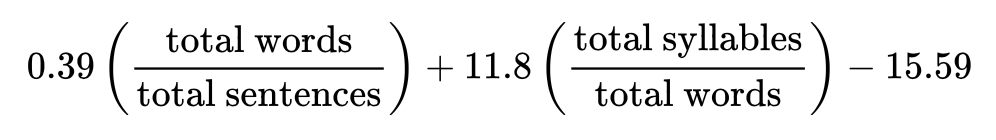

## Looking at the correlations

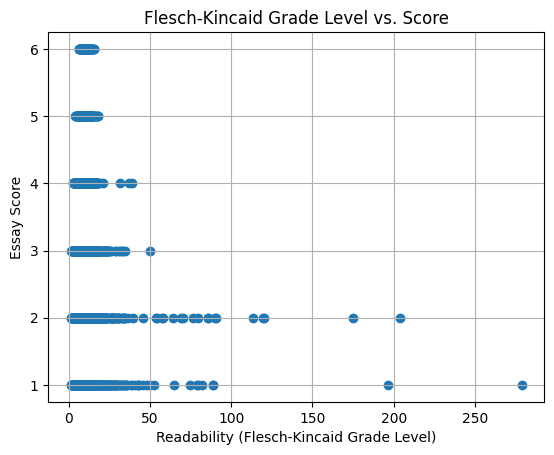

Correlation between Flesch-Kincaid Grade Level and score: -0.023616473610653183


In [21]:
# Calculate the Flesch-Kincaid Grade Level
train['readability'] = train['full_text'].apply(textstat.flesch_kincaid_grade)

plt.scatter(train['readability'], train['score'])
plt.title('Flesch-Kincaid Grade Level vs. Score')
plt.xlabel('Readability (Flesch-Kincaid Grade Level)')
plt.ylabel('Essay Score')
plt.grid(True)
plt.show()

# Correlation between Flesch-Kincaid Grade Level and score
correlation = train['readability'].corr(train['score'])
print(f"Correlation between Flesch-Kincaid Grade Level and score: {correlation}")